In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# Data cleaning

In [30]:
df_countries = pd.read_csv('df_countries_2.csv', sep=';')

In [31]:
df_countries

,alpha_2_code,country
0,AF,Afghanistan
1,AL,Albania
2,DZ,Algeria
3,AS,American Samoa
4,AD,Andorra
...,...,...
244,EH,Western Sahara
245,YE,Yemen
246,ZM,Zambia
247,ZW,Zimbabwe


In [32]:
experience_level_map = {
    'EN': '1. Entry_level',
    'MI': '2. Mid_Intermediate_level',
    'SE': '3. Senior_level',
    'EX': '4. Executive_level'
}

employment_type_map = {
    'CT': 'Contractual',
    'FL': 'Freelancer',
    'FT': 'Full_Time',
    'PT': 'Part_Time'
}


In [33]:
df_salaries = pd.read_csv('ds_salaries.csv')

In [34]:
df_salaries.experience_level.value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [35]:
df_salaries.salary_in_usd.describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [36]:
df_salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [37]:


df_salaries = df_salaries.merge(df_countries[['alpha_2_code','country']],how = 'left', left_on = 'employee_residence', right_on = 'alpha_2_code', suffixes=('','_employee_residence'))
df_salaries = df_salaries.merge(df_countries[['alpha_2_code','country']],how = 'left', left_on = 'company_location', right_on = 'alpha_2_code', suffixes=('','_company_location'))
df_salaries = df_salaries.drop(columns=['alpha_2_code','alpha_2_code_company_location','employee_residence','company_location'])

df_salaries = df_salaries.rename(columns= {'country':'country_employee_residence'})

df_salaries['experience_level'] = df_salaries['experience_level'].apply(lambda x: experience_level_map[x])
df_salaries['employment_type'] = df_salaries['employment_type'].apply(lambda x: employment_type_map[x])


In [38]:
df_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,country_employee_residence,country_company_location
0,2023,3. Senior_level,Full_Time,Principal Data Scientist,80000,EUR,85847,100,L,Spain,Spain
1,2023,2. Mid_Intermediate_level,Contractual,ML Engineer,30000,USD,30000,100,S,United States of America,United States of America
2,2023,2. Mid_Intermediate_level,Contractual,ML Engineer,25500,USD,25500,100,S,United States of America,United States of America
3,2023,3. Senior_level,Full_Time,Data Scientist,175000,USD,175000,100,M,Canada,Canada
4,2023,3. Senior_level,Full_Time,Data Scientist,120000,USD,120000,100,M,Canada,Canada
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3. Senior_level,Full_Time,Data Scientist,412000,USD,412000,100,L,United States of America,United States of America
3751,2021,2. Mid_Intermediate_level,Full_Time,Principal Data Scientist,151000,USD,151000,100,L,United States of America,United States of America
3752,2020,1. Entry_level,Full_Time,Data Scientist,105000,USD,105000,100,S,United States of America,United States of America
3753,2020,1. Entry_level,Contractual,Business Data Analyst,100000,USD,100000,100,L,United States of America,United States of America


In [39]:
df_salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'remote_ratio',
       'company_size', 'country_employee_residence',
       'country_company_location'],
      dtype='object')

In [40]:
col = ['job_title', 'salary_currency', 'country_employee_residence', 'country_company_location']

In [41]:
for c in col:
    # Top values in column
    li_top = df_salaries[c].value_counts()[:5].index
    df_salaries.loc[~df_salaries[c].isin(li_top), c] = 'Others'


In [42]:
df_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,country_employee_residence,country_company_location
0,2023,3. Senior_level,Full_Time,Others,80000,EUR,85847,100,L,Spain,Spain
1,2023,2. Mid_Intermediate_level,Contractual,Others,30000,USD,30000,100,S,United States of America,United States of America
2,2023,2. Mid_Intermediate_level,Contractual,Others,25500,USD,25500,100,S,United States of America,United States of America
3,2023,3. Senior_level,Full_Time,Data Scientist,175000,USD,175000,100,M,Canada,Canada
4,2023,3. Senior_level,Full_Time,Data Scientist,120000,USD,120000,100,M,Canada,Canada
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3. Senior_level,Full_Time,Data Scientist,412000,USD,412000,100,L,United States of America,United States of America
3751,2021,2. Mid_Intermediate_level,Full_Time,Others,151000,USD,151000,100,L,United States of America,United States of America
3752,2020,1. Entry_level,Full_Time,Data Scientist,105000,USD,105000,100,S,United States of America,United States of America
3753,2020,1. Entry_level,Contractual,Others,100000,USD,100000,100,L,United States of America,United States of America


In [43]:
df_salaries.salary_currency.value_counts()

USD       3224
EUR        236
GBP        161
INR         60
Others      49
CAD         25
Name: salary_currency, dtype: int64

# Outliers cleaning

In [44]:
df_salaries['salary_in_usd'].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

<Axes: >

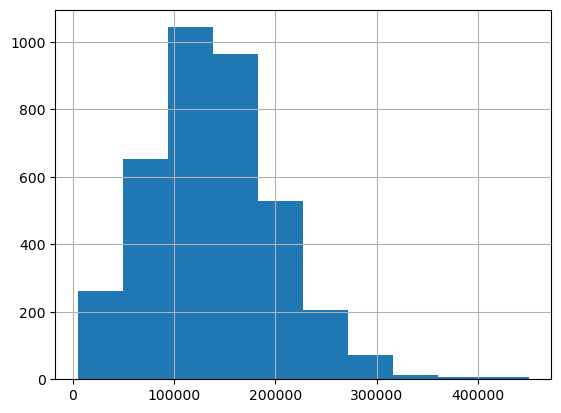

In [45]:
df_salaries['salary_in_usd'].hist()

In [46]:
Q1 = df_salaries['salary_in_usd'].quantile(0.25)
Q3 = df_salaries['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
print('Límite superior: ' + str(Q3 + 2 * IQR))
df_salaries['salary_in_usd'] = np.where((df_salaries['salary_in_usd'] < (Q3 + 2 * IQR)), df_salaries['salary_in_usd'], Q3 + 2 * IQR)

Límite superior: 335000.0


<Axes: >

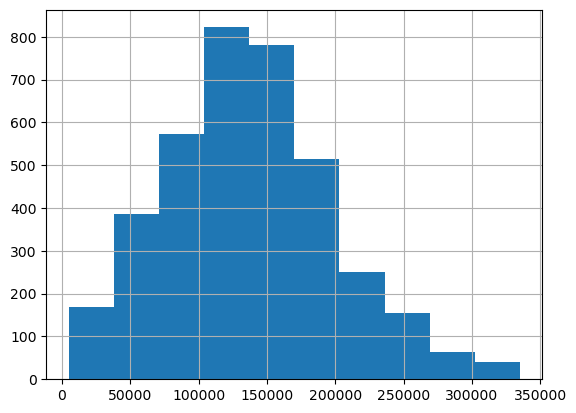

In [47]:
df_salaries['salary_in_usd'].hist()

In [48]:
df_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,country_employee_residence,country_company_location
0,2023,3. Senior_level,Full_Time,Others,80000,EUR,85847.0,100,L,Spain,Spain
1,2023,2. Mid_Intermediate_level,Contractual,Others,30000,USD,30000.0,100,S,United States of America,United States of America
2,2023,2. Mid_Intermediate_level,Contractual,Others,25500,USD,25500.0,100,S,United States of America,United States of America
3,2023,3. Senior_level,Full_Time,Data Scientist,175000,USD,175000.0,100,M,Canada,Canada
4,2023,3. Senior_level,Full_Time,Data Scientist,120000,USD,120000.0,100,M,Canada,Canada
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3. Senior_level,Full_Time,Data Scientist,412000,USD,335000.0,100,L,United States of America,United States of America
3751,2021,2. Mid_Intermediate_level,Full_Time,Others,151000,USD,151000.0,100,L,United States of America,United States of America
3752,2020,1. Entry_level,Full_Time,Data Scientist,105000,USD,105000.0,100,S,United States of America,United States of America
3753,2020,1. Entry_level,Contractual,Others,100000,USD,100000.0,100,L,United States of America,United States of America


In [49]:
df_salaries.to_csv('cleaned_db.csv', index = False)

# Exploratory Data Analysis



In [50]:
df = df_salaries

In [51]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137309.193875,46.271638
std,0.691448,6.716765e+05,62085.197725,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,335000.000000,100.000000


<Axes: >

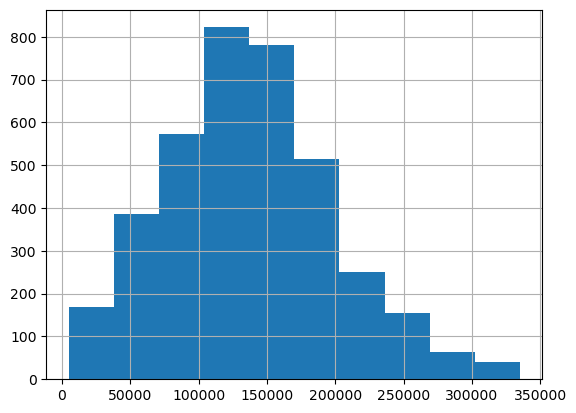

In [52]:
df[df['salary_in_usd']<= 750000].salary_in_usd.hist()

<Axes: >

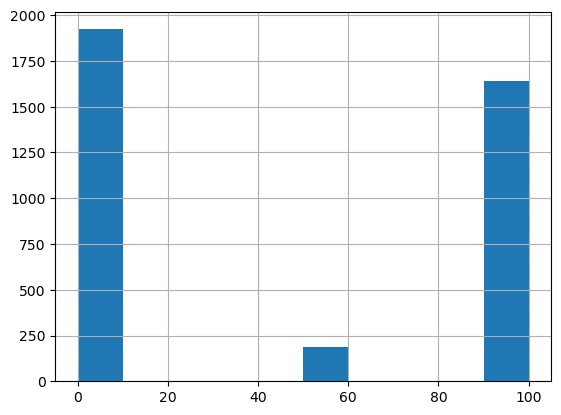

In [53]:
df.remote_ratio.hist()

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

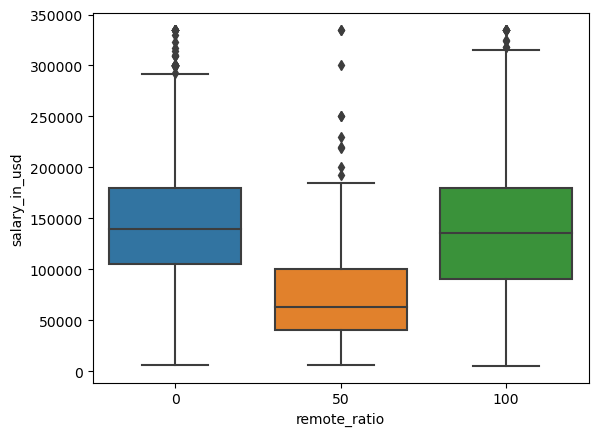

In [54]:
# create grouped boxplot 
sns.boxplot(x = df['remote_ratio'],
            y = df['salary_in_usd'])

In [55]:
df.experience_level.value_counts()

3. Senior_level              2516
2. Mid_Intermediate_level     805
1. Entry_level                320
4. Executive_level            114
Name: experience_level, dtype: int64

In [56]:
df.employment_type.value_counts()

Full_Time      3718
Part_Time        17
Contractual      10
Freelancer       10
Name: employment_type, dtype: int64

In [57]:
df.job_title.value_counts()[:10].sum()

3755

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

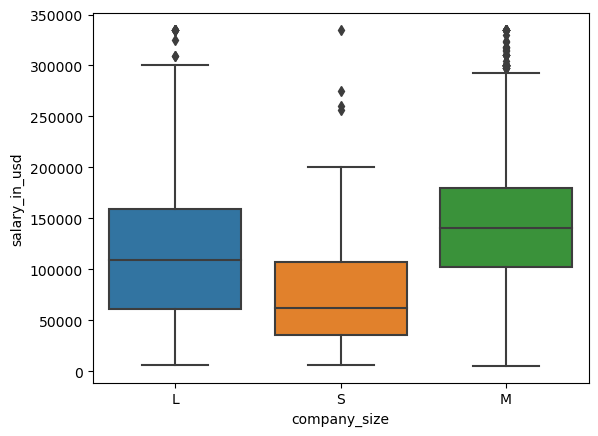

In [58]:
# create grouped boxplot 
sns.boxplot(x = df['company_size'],
            y = df['salary_in_usd'])

<Axes: xlabel='salary_in_usd', ylabel='job_title'>

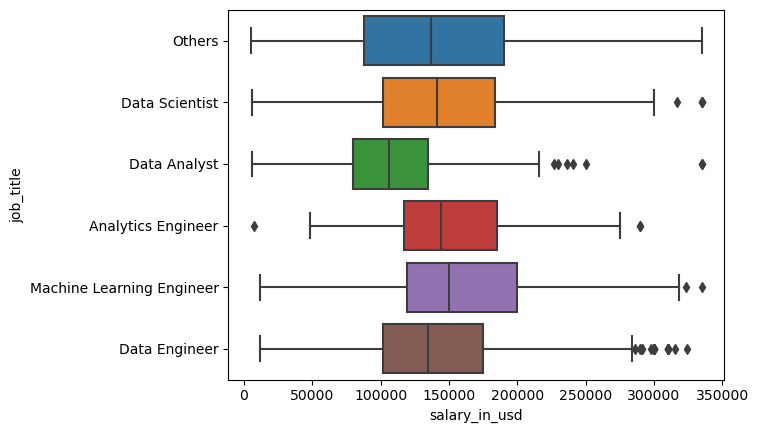

In [59]:
# create grouped boxplot 
sns.boxplot(y = df['job_title'],
            x = df['salary_in_usd'],
            orient = 'h')

<Axes: xlabel='salary_in_usd', ylabel='experience_level'>

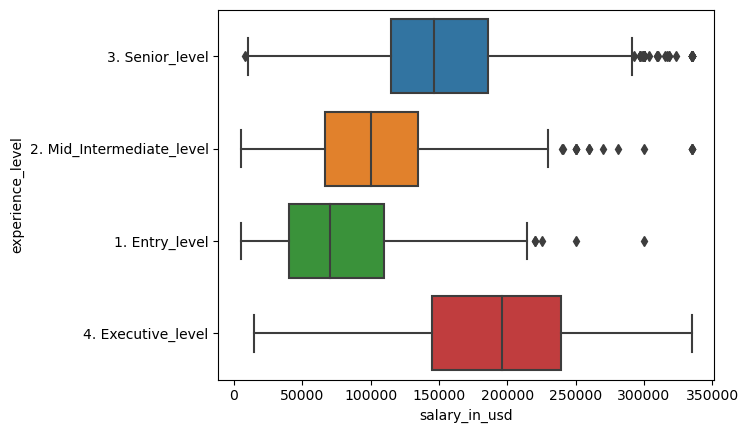

In [60]:
# create grouped boxplot 
sns.boxplot(y = df['experience_level'],
            x = df['salary_in_usd'],
            orient = 'h')

In [61]:
df.job_title.value_counts()

Data Engineer                1040
Others                        871
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Name: job_title, dtype: int64

In [62]:
list(df.experience_level.value_counts().keys())

['3. Senior_level',
 '2. Mid_Intermediate_level',
 '1. Entry_level',
 '4. Executive_level']

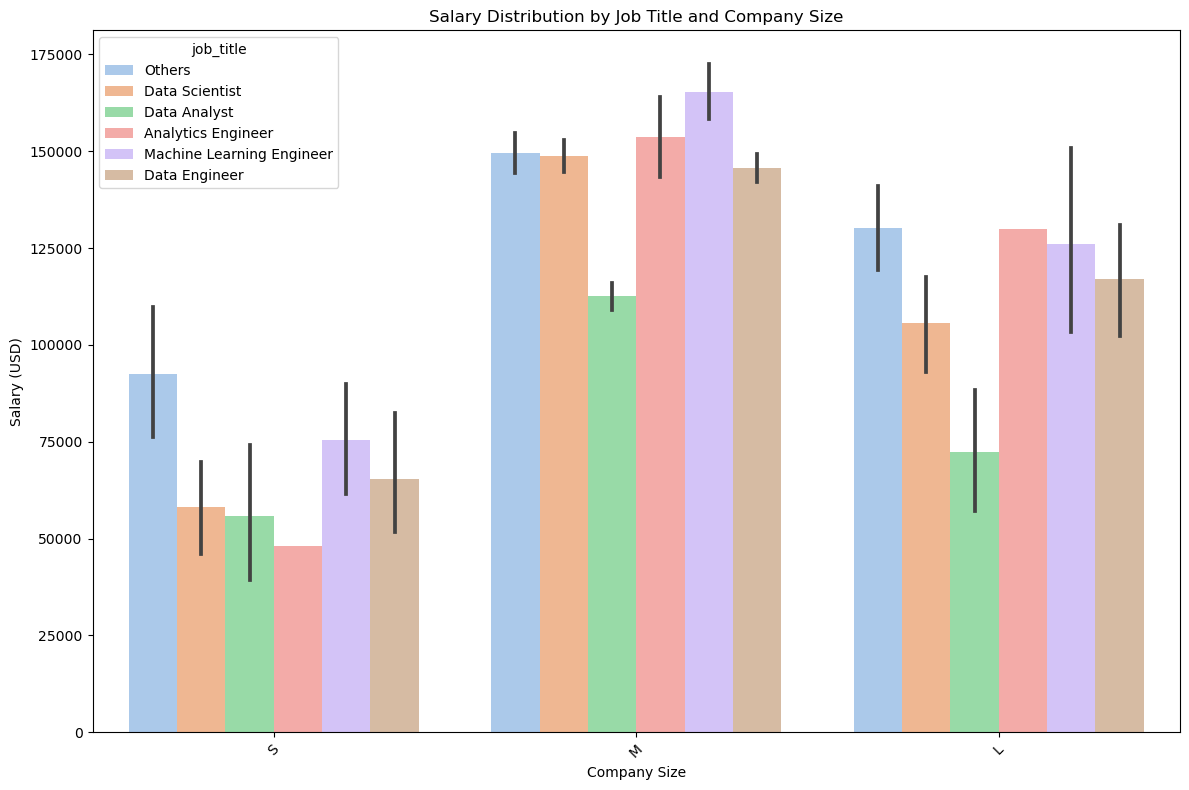

In [63]:
plt.figure(figsize=(12, 8))
company_size_order = ['S', 'M', 'L']
minimal_palette = sns.color_palette("pastel")
sns.barplot(x='company_size', y='salary_in_usd', hue='job_title', data=df_salaries, hue_order=df_salaries['job_title'].unique(), order= company_size_order, palette=minimal_palette)
plt.xlabel("Company Size")
plt.ylabel("Salary (USD)")
plt.title("Salary Distribution by Job Title and Company Size")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

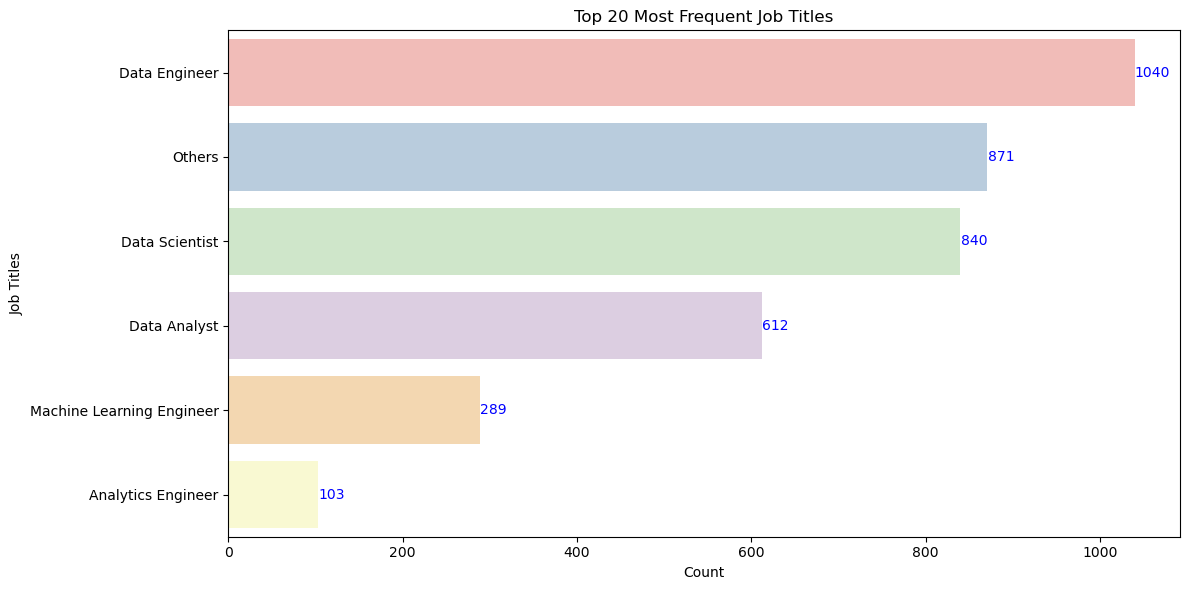

In [64]:
# Extract the "job title" column
job_titles = df_salaries['job_title']

# Calculate the frequency of each job title
title_counts = job_titles.value_counts()

# Extract the top 20 most frequent job titles
top_20_titles = title_counts.head(20)

# Create a DataFrame for the top 20 titles
top_20_df = pd.DataFrame({'Job Title': top_20_titles.index, 'Count': top_20_titles.values})

# Plotting the count plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_20_df, x='Count', y='Job Title', palette="Pastel1")
plt.xlabel('Count')
plt.ylabel('Job Titles')
plt.title('Top 20 Most Frequent Job Titles')

# Add count labels to the bars
for i, v in enumerate(top_20_df['Count']):
    ax.text(v + 0.2, i, str(v), color='blue', va='center')

plt.tight_layout()
plt.show()

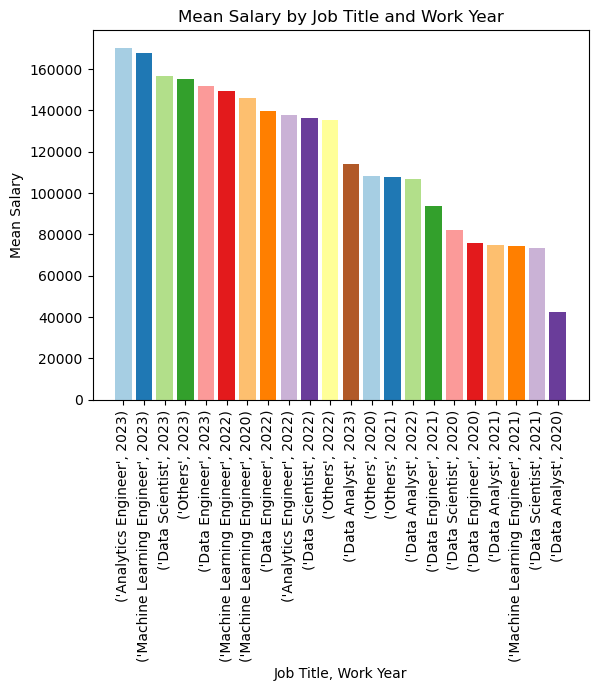

In [65]:


# Assuming you have loaded the DataFrame 'df_salaries' already

# Create a categorical color map for the combinations of 'Job Title' and 'Work Year'
color_map = sns.color_palette('Paired', n_colors=len(df_salaries['job_title'].unique()) * len(df_salaries['work_year'].unique()))

# Group by 'job_title' and 'work_year' and calculate the mean salary
grouped_data = df_salaries.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.bar(range(len(grouped_data)), grouped_data.values, color=color_map)
plt.xlabel("Job Title, Work Year")
plt.ylabel("Mean Salary")
plt.title("Mean Salary by Job Title and Work Year")
plt.xticks(range(len(grouped_data)), grouped_data.index, rotation=90)  # Set the x-axis ticks and labels
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()


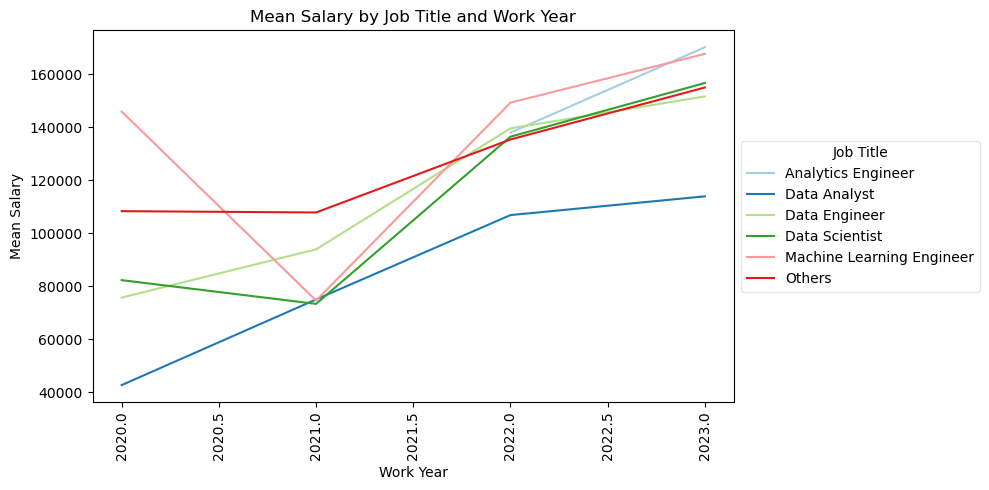

In [66]:
# Create a categorical color map for the combinations of 'Job Title'
color_map = sns.color_palette('Paired', n_colors=len(df_salaries['job_title'].unique()))

# Group by 'job_title' and 'work_year' and calculate the mean salary
grouped_data = df_salaries.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().reset_index()

# Filter out specific work years from the grouped_data
excluded_work_years = [2020.5, 2021.5, 2022.5]
grouped_data = grouped_data[~grouped_data['work_year'].isin(excluded_work_years)]

# Plot the line chart with 'Job Title' as colors and 'Work Year' on the x-axis
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_data, x='work_year', y='salary_in_usd', hue='job_title', palette=color_map)

plt.xlabel("Work Year")
plt.ylabel("Mean Salary")
plt.title("Mean Salary by Job Title and Work Year")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Place the legend on the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Job Title', framealpha=0.5)

plt.tight_layout()
plt.show()


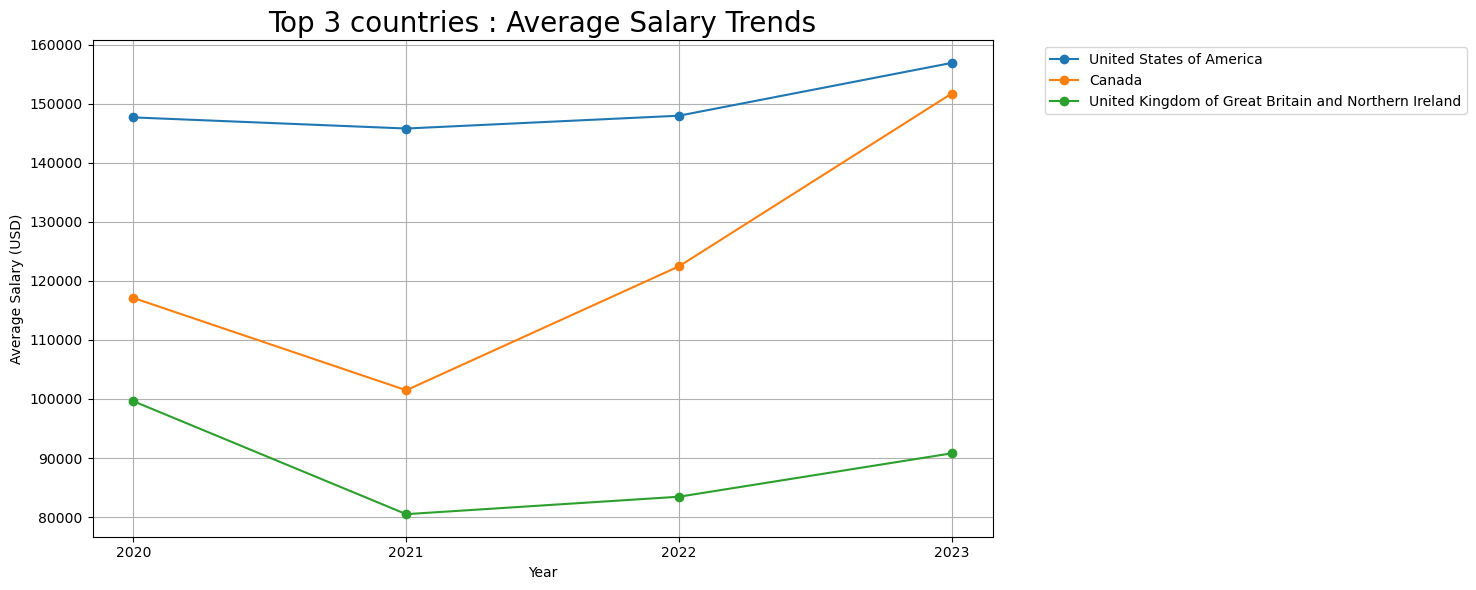

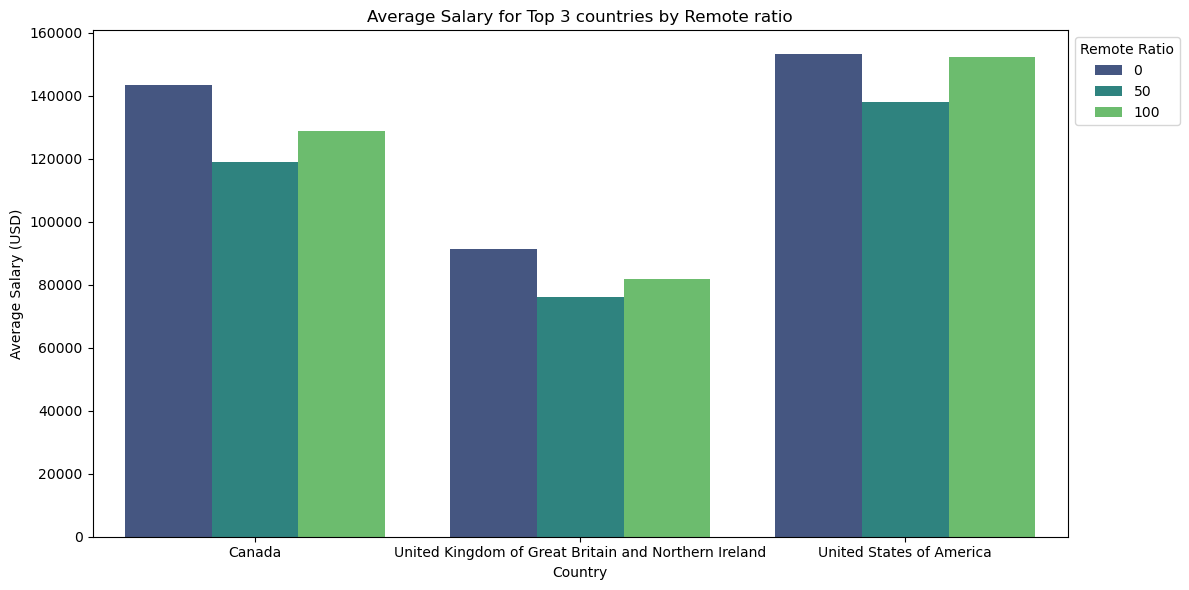

    remote_ratio           experience_level  count  percentage
0              0             1. Entry_level    111    5.772231
1              0  2. Mid_Intermediate_level    396   20.592824
2              0            3. Senior_level   1360   70.722829
3              0         4. Executive_level     56    2.912116
4             50             1. Entry_level     65   34.391534
5             50  2. Mid_Intermediate_level     74   39.153439
6             50            3. Senior_level     44   23.280423
7             50         4. Executive_level      6    3.174603
8            100             1. Entry_level    144    8.764455
9            100  2. Mid_Intermediate_level    335   20.389531
10           100            3. Senior_level   1112   67.681071
11           100         4. Executive_level     52    3.164942


<Figure size 1000x600 with 0 Axes>

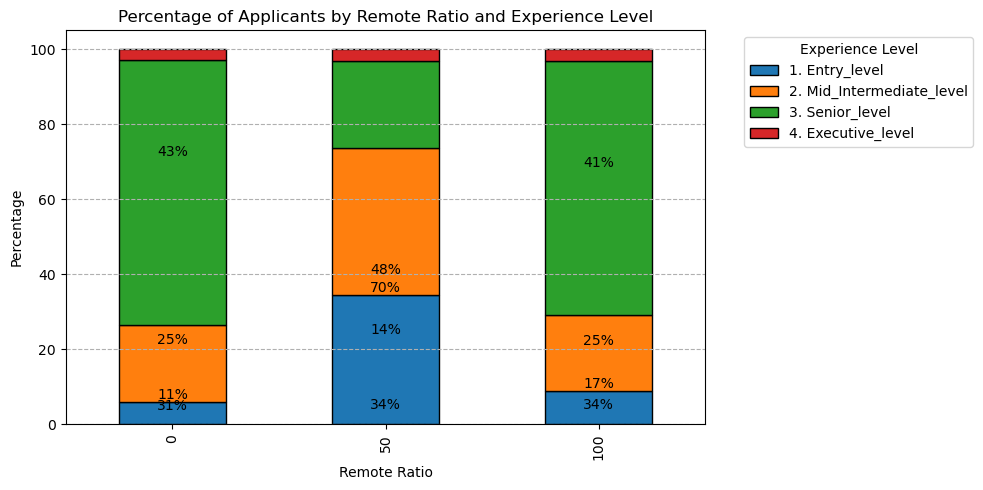

In [67]:

df=pd.read_csv('cleaned_db.csv')
df.head()
import seaborn as sns
import matplotlib.pyplot as plt
##EDA Chart 2
##Get top 5 countries with the highest average salary (all years)
average_salary_by_country=df.groupby('country_employee_residence')['salary_in_usd'].mean()
average_salary_by_country_df=pd.DataFrame({'country_employee_residence':average_salary_by_country.index,'average_salary_in_usd':average_salary_by_country.values})
average_salary_by_country_df=average_salary_by_country_df.sort_values(by='average_salary_in_usd',ascending=False)
top_3_countries=average_salary_by_country_df.head(3)
plt.figure(figsize=(15, 6))  # Adjust the figure size if needed
for country in top_3_countries['country_employee_residence']:
    country_data = df[df['country_employee_residence'] == country]
    average_salary_by_year = country_data.groupby('work_year')['salary_in_usd'].mean().reset_index()
    plt.plot(average_salary_by_year['work_year'], average_salary_by_year['salary_in_usd'], marker='o', label=country)
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(average_salary_by_year['work_year'].astype(int))  # Set x-axis ticks as integers (years)
plt.title('Top 3 countries : Average Salary Trends',fontsize=20)
plt.grid(True)
# Move the legend to the side
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
# Adjust the layout to make room for the legend
plt.tight_layout()
# Show the plot
plt.show()
df1=df[df['country_employee_residence'].isin(top_3_countries['country_employee_residence'])]
avg_sal_remote=df1.groupby(['country_employee_residence','remote_ratio'])['salary_in_usd'].mean()
avg_sal_remote_df = avg_sal_remote.reset_index()
# Sort the DataFrame by ‘salary_in_usd’ within each ‘country_employee_residence’ group
avg_sal_remote_df_sorted = avg_sal_remote_df.groupby('country_employee_residence', group_keys=False).apply(lambda x: x.sort_values('salary_in_usd', ascending=False))
# Plot the stacked bar chart using seaborn
plt.figure(figsize=(12,6))
sns.barplot(data=avg_sal_remote_df_sorted, x='country_employee_residence', y='salary_in_usd', hue='remote_ratio', palette='viridis')
# Set labels and title
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary for Top 3 countries by Remote ratio')
# Add a legend
plt.legend(title='Remote Ratio', loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.tight_layout()
plt.show()
count_by_remote_ratio_and_experience = df.groupby(['remote_ratio', 'experience_level']).size().reset_index(name='count')
total_count_by_ratio = count_by_remote_ratio_and_experience.groupby('remote_ratio')['count'].sum()
count_by_remote_ratio_and_experience['percentage'] = count_by_remote_ratio_and_experience.apply(lambda row: round(((row['count'] / total_count_by_ratio[row['remote_ratio']]) * 100),0), axis=1)
count_by_remote_ratio_and_experience
##Are high level jobs mostly non-remote
# Group data by “remote_ratio” and “experience_level,” and calculate the count for each group
count_by_remote_ratio_and_experience = df.groupby(['remote_ratio', 'experience_level']).size().reset_index(name='count')
count_by_remote_ratio_and_experience['percentage'] = count_by_remote_ratio_and_experience.apply(lambda row: (row['count'] / total_count_by_ratio[row['remote_ratio']]) * 100, axis=1)
print(count_by_remote_ratio_and_experience)
# Pivot the DataFrame to create a stacked structure
df_stacked = count_by_remote_ratio_and_experience.pivot(index='remote_ratio', columns='experience_level', values='percentage')
# Sum the percentages to set the correct height for each bar
df_stacked = df_stacked.apply(lambda row: row / row.sum() * 100, axis=1)

# Create the stacked bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = df_stacked.plot(kind='bar', stacked=True, edgecolor='black')
# Add percentage labels to each segment of the bars (formatted as integers)
for container in ax.containers:
    total_height = 0
    for value in container:
        total_height += value.get_height()
    for bar in container:
        height = bar.get_height()
        percentage = f'{int(height / total_height * 100)}%'
        plt.text(bar.get_x() + bar.get_width() / 2, height, percentage, ha='center', va='bottom', fontsize=10)
# Customize the plot
plt.xlabel('Remote Ratio')
plt.ylabel('Percentage')
plt.title('Percentage of Applicants by Remote Ratio and Experience Level', fontsize=12)
plt.grid(axis='y', linestyle='--')
# Move the legend to the side
plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.tight_layout()
plt.show()


# One Hot Encoding

In [68]:
col_encode = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'company_size', 'country_employee_residence', 'country_company_location']
df_salaries = pd.get_dummies(df_salaries, columns=col_encode, drop_first=True)
df_salaries.drop(columns='salary',inplace=True)
df_salaries.head()

,work_year,salary_in_usd,remote_ratio,experience_level_2. Mid_Intermediate_level,experience_level_3. Senior_level,experience_level_4. Executive_level,employment_type_Freelancer,employment_type_Full_Time,employment_type_Part_Time,job_title_Data Analyst,...,country_employee_residence_India,country_employee_residence_Others,country_employee_residence_Spain,country_employee_residence_United Kingdom of Great Britain and Northern Ireland,country_employee_residence_United States of America,country_company_location_India,country_company_location_Others,country_company_location_Spain,country_company_location_United Kingdom of Great Britain and Northern Ireland,country_company_location_United States of America
0,2023,85847.0,100,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2023,30000.0,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2023,25500.0,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2023,175000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023,120000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df_salaries.to_csv('model_db.csv', index = False)

# MODEL BUILDING

In [70]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
import statsmodels.api as sm
import math
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from pprint import pprint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, fbeta_score, r2_score, mean_squared_error
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import timeit
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import linear_model, tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
import warnings
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image  
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr
warnings.filterwarnings('ignore')

C:\Users\dhruv\AppData\Local\Temp\ipykernel_3148\3731175926.py:30: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [71]:
df = pd.read_csv('model_db.csv', sep=',')

In [72]:
df

,work_year,salary_in_usd,remote_ratio,experience_level_2. Mid_Intermediate_level,experience_level_3. Senior_level,experience_level_4. Executive_level,employment_type_Freelancer,employment_type_Full_Time,employment_type_Part_Time,job_title_Data Analyst,...,country_employee_residence_India,country_employee_residence_Others,country_employee_residence_Spain,country_employee_residence_United Kingdom of Great Britain and Northern Ireland,country_employee_residence_United States of America,country_company_location_India,country_company_location_Others,country_company_location_Spain,country_company_location_United Kingdom of Great Britain and Northern Ireland,country_company_location_United States of America
0,2023,85847.0,100,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2023,30000.0,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2023,25500.0,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2023,175000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023,120000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,335000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3751,2021,151000.0,100,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3752,2020,105000.0,100,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3753,2020,100000.0,100,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [73]:
column = df.columns

In [74]:
X = df.drop(['salary_in_usd'], axis = 1)
y = df.salary_in_usd

In [75]:
y

0        85847.0
1        30000.0
2        25500.0
3       175000.0
4       120000.0
          ...   
3750    335000.0
3751    151000.0
3752    105000.0
3753    100000.0
3754     94665.0
Name: salary_in_usd, Length: 3755, dtype: float64

In [76]:
df

,work_year,salary_in_usd,remote_ratio,experience_level_2. Mid_Intermediate_level,experience_level_3. Senior_level,experience_level_4. Executive_level,employment_type_Freelancer,employment_type_Full_Time,employment_type_Part_Time,job_title_Data Analyst,...,country_employee_residence_India,country_employee_residence_Others,country_employee_residence_Spain,country_employee_residence_United Kingdom of Great Britain and Northern Ireland,country_employee_residence_United States of America,country_company_location_India,country_company_location_Others,country_company_location_Spain,country_company_location_United Kingdom of Great Britain and Northern Ireland,country_company_location_United States of America
0,2023,85847.0,100,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2023,30000.0,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2023,25500.0,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2023,175000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023,120000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,335000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3751,2021,151000.0,100,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3752,2020,105000.0,100,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3753,2020,100000.0,100,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [77]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [78]:
x_train

,work_year,remote_ratio,experience_level_2. Mid_Intermediate_level,experience_level_3. Senior_level,experience_level_4. Executive_level,employment_type_Freelancer,employment_type_Full_Time,employment_type_Part_Time,job_title_Data Analyst,job_title_Data Engineer,...,country_employee_residence_India,country_employee_residence_Others,country_employee_residence_Spain,country_employee_residence_United Kingdom of Great Britain and Northern Ireland,country_employee_residence_United States of America,country_company_location_India,country_company_location_Others,country_company_location_Spain,country_company_location_United Kingdom of Great Britain and Northern Ireland,country_company_location_United States of America
206,2023,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1199,2023,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1290,2023,100,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1173,2023,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1130,2023,100,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2023,100,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1346,2023,100,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3454,2022,100,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,2022,100,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [79]:
X.describe()

,work_year,remote_ratio,experience_level_2. Mid_Intermediate_level,experience_level_3. Senior_level,experience_level_4. Executive_level,employment_type_Freelancer,employment_type_Full_Time,employment_type_Part_Time,job_title_Data Analyst,job_title_Data Engineer,...,country_employee_residence_India,country_employee_residence_Others,country_employee_residence_Spain,country_employee_residence_United Kingdom of Great Britain and Northern Ireland,country_employee_residence_United States of America,country_company_location_India,country_company_location_Others,country_company_location_Spain,country_company_location_United Kingdom of Great Britain and Northern Ireland,country_company_location_United States of America
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,...,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.373635,46.271638,0.214381,0.670040,0.030360,0.002663,0.990146,0.004527,0.162983,0.276964,...,0.018908,0.092676,0.021305,0.044474,0.800000,0.015446,0.085486,0.020506,0.045806,0.809587
std,0.691448,48.589050,0.410447,0.470261,0.171597,0.051543,0.098788,0.067142,0.369399,0.447558,...,0.136219,0.290017,0.144418,0.206173,0.400053,0.123335,0.279641,0.141742,0.209091,0.392679
min,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2022.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2023.000000,100.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2023.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Grid Search

In [80]:

#### Random Forest Regressor ####
Pipeline_RF=Pipeline(steps=[("Scaler",StandardScaler()),("Random Forest",RandomForestRegressor())])

Param_RF = {
'Random Forest__max_depth': np.linspace(10, 100, 10, endpoint=True).astype(int),
'Random Forest__max_features': np.linspace(5, x_train.shape[1], 10, endpoint=True).astype(int)
}

Grid_RF = GridSearchCV(estimator=Pipeline_RF, param_grid=Param_RF,scoring='r2',cv=10) 

#### Ridge Regression ####
Pipeline_Ridge=Pipeline(steps=[("Scaler",StandardScaler()),("Ridge", Ridge())])

Param_Ridge= {
    'Ridge__alpha': np.logspace(-10, 5, 10)
}

Grid_Ridge = GridSearchCV(estimator=Pipeline_Ridge, param_grid=Param_Ridge,scoring='r2',cv=10)

In [81]:
grids=[Grid_RF,Grid_Ridge]
grid_dict = {0: 'Random Forest',1: 'Ridge'}

In [82]:
print('Performing model optimizations')
best_r2 = 0
best_reg = 0
best_gs = ''
#index=pais[country]
#df1=df[df['country']==index]
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(x_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training R2: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(x_test)
    # Test data accuracy of model with best params
    print('Test set R2 score for best params: %.3f ' % r2_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if r2_score(y_test, y_pred) > best_r2:
        best_r2 = r2_score(y_test, y_pred)
        best_gs = gs
        best_reg = idx
print('\nClassifier with best test set R2 %s' % grid_dict[best_reg])
Prueba=best_gs.best_estimator_.fit(x_test,y_test)
if best_reg==2 or best_reg==3:
    importances=abs(Prueba.named_steps[grid_dict[best_reg]].coef_)
else:
    importances=Prueba.named_steps[grid_dict[best_reg]].feature_importances_

Performing model optimizations

Estimator: Random Forest
Best params: {'Random Forest__max_depth': 10, 'Random Forest__max_features': 5}
Best training R2: 0.407
Test set R2 score for best params: 0.455 

Estimator: Ridge
Best params: {'Ridge__alpha': 46.415888336127914}
Best training R2: 0.401
Test set R2 score for best params: 0.442 

Classifier with best test set R2 Random Forest


# Different models trained below:

# XGBoost and KNN

Note: you may need to restart the kernel to use updated packages.
XGBoost Model Evaluation:
Training Set R-squared: 0.4509303302307991
Training Set RMSE: 46379.40587472103
Test Set R-squared: 0.45409368656072757
Test Set RMSE: 44199.1388844861
K-Nearest Neighbors (KNN) Model Evaluation:
Training Set R-squared: 0.5166391966952648
Training Set RMSE: 43515.81970354072
Test Set R-squared: 0.37809918673953846
Test Set RMSE: 47175.369680621974


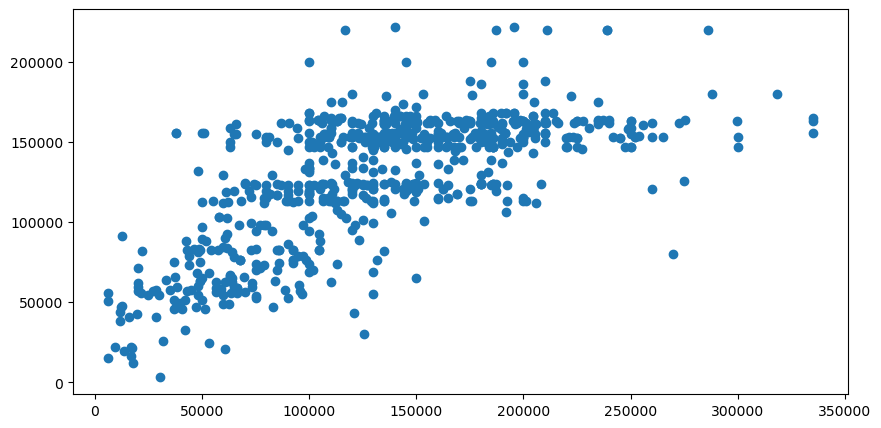

In [83]:
%pip install scikit-learn
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd
import seaborn as sns
import xgboost as xgb
from xgboost.sklearn import XGBClassifier, XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from pprint import pprint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, fbeta_score, r2_score, mean_squared_error
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import timeit
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import linear_model, tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
#Read the excel file
#df = pd.read_csv("model_db.csv")
df = pd.read_excel("condensed_file.xlsx")



#Seperate the predictors and the target variable
X = df.drop(['salary_in_usd'], axis = 1)
y = df.salary_in_usd
#Split the Data into test and train set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
#Model 1 XGBoost Regressor
# XGBoost Regressor and set its hyperparameters
xgboost_model = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=30, random_state=123)
# Train (fit) the XGBoost model on the training data
xgboost_model.fit(x_train, y_train)
# Make predictions on the training and test data using the trained XGBoost model
y_train_pred = xgboost_model.predict(x_train)
y_test_pred = xgboost_model.predict(x_test)
# Evaluate the model's performance using R-squared and RMSE for training set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
# Evaluate the model's performance using R-squared and RMSE for test set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("XGBoost Model Evaluation:")
print("Training Set R-squared:", r2_train)
print("Training Set RMSE:", rmse_train)
print("Test Set R-squared:", r2_test)
print("Test Set RMSE:", rmse_test)
plt.scatter(y_test, y_test_pred)






# Model 2- KNN
# Create an instance of the K-Nearest Neighbors Regressor and set its hyperparameters
knn_model = KNeighborsRegressor(n_neighbors=21, weights='distance')
# Train (fit) the KNN model on the training data
knn_model.fit(x_train, y_train)
# Make predictions on the training and test data using the trained KNN model
y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)
# Evaluate the model's performance using R-squared and RMSE for training set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
# Evaluate the model's performance using R-squared and RMSE for test set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("K-Nearest Neighbors (KNN) Model Evaluation:")
print("Training Set R-squared:", r2_train)
print("Training Set RMSE:", rmse_train)
print("Test Set R-squared:", r2_test)
print("Test Set RMSE:", rmse_test)



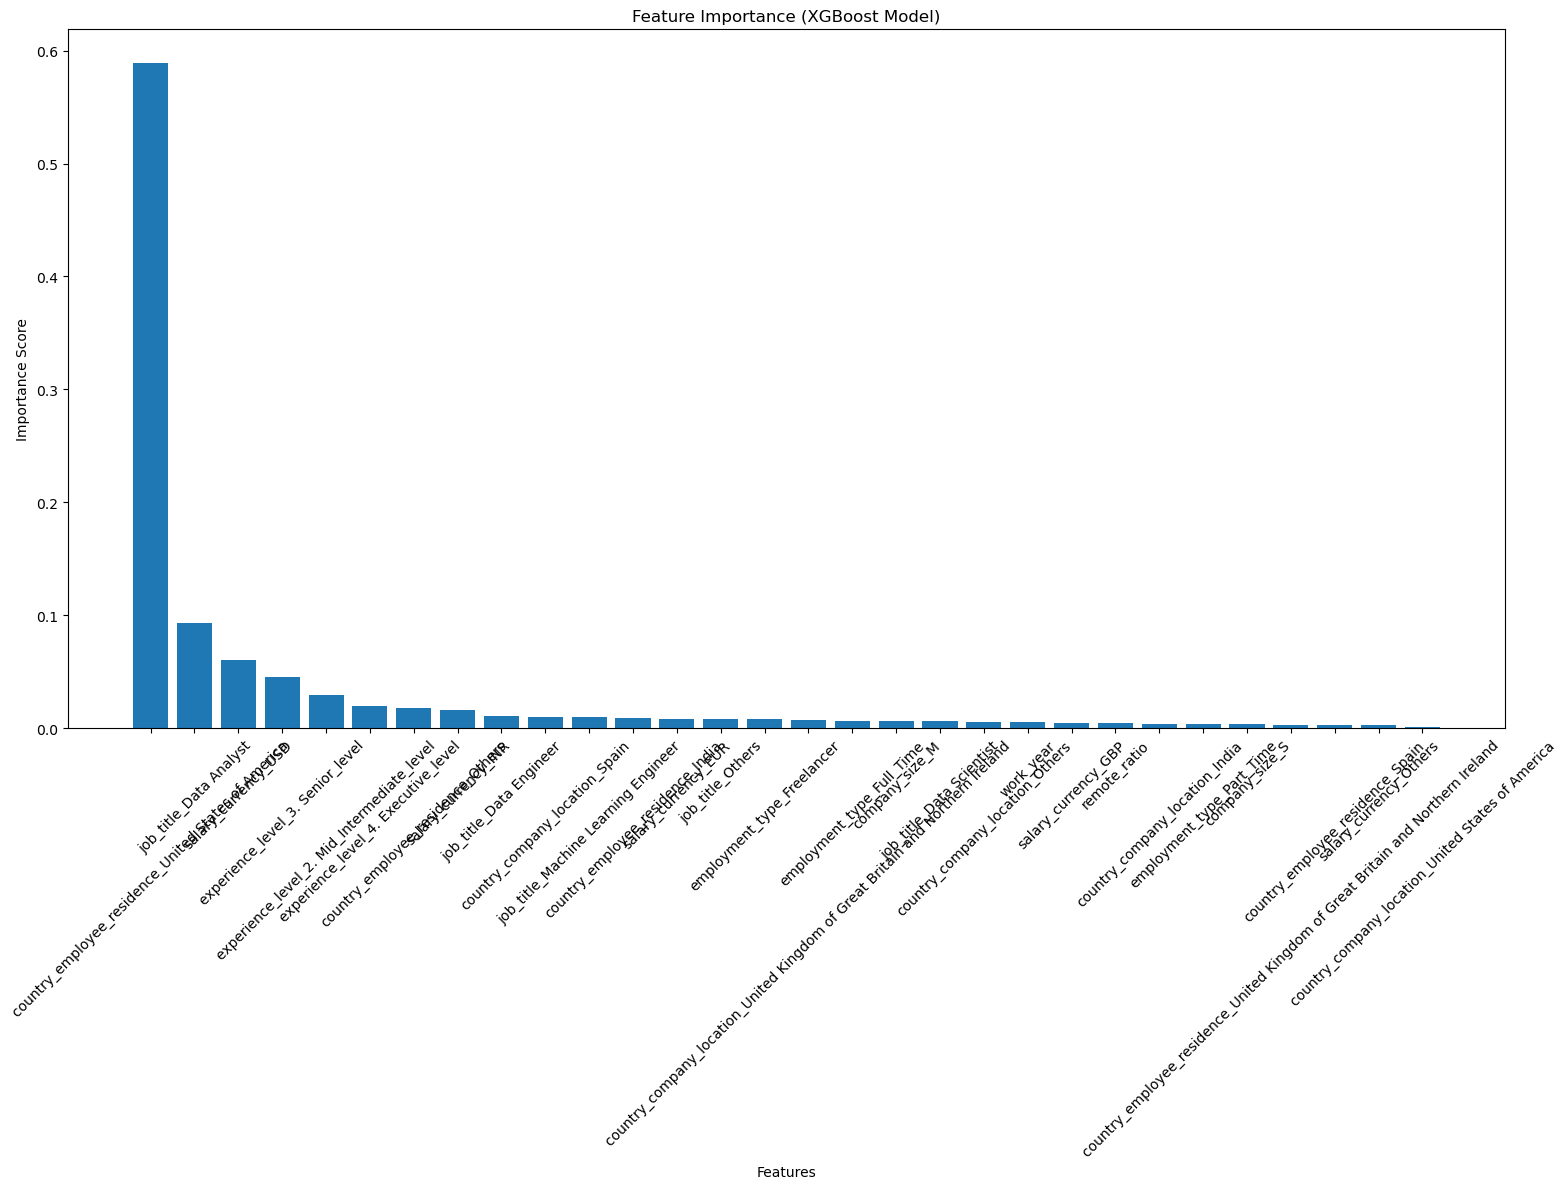

In [84]:
# Get feature importances from the trained XGBoost model
importance_scores = xgboost_model.feature_importances_
# Get the names of the features
feature_names = X.columns
# Create a DataFrame to hold the feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})
# Sort the features by their importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plot the feature importance scores
plt.figure(figsize=(16, 12))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance (XGBoost Model)')
plt.tight_layout()
plt.show()

# Linear Regression, Ridge and Random Forest

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     73.53
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:11:18   Log-Likelihood:                -36580.
No. Observations:                3004   AIC:                         7.322e+04
Df Residuals:                    2973   BIC:                         7.341e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

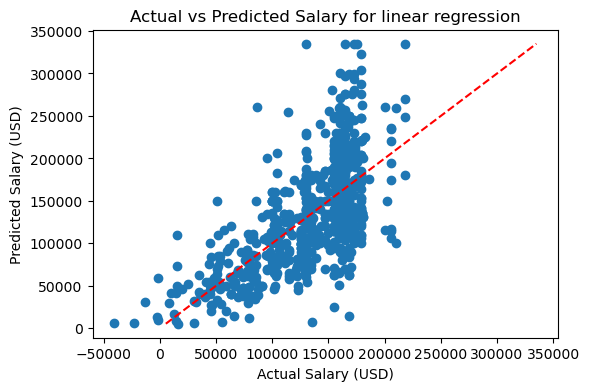

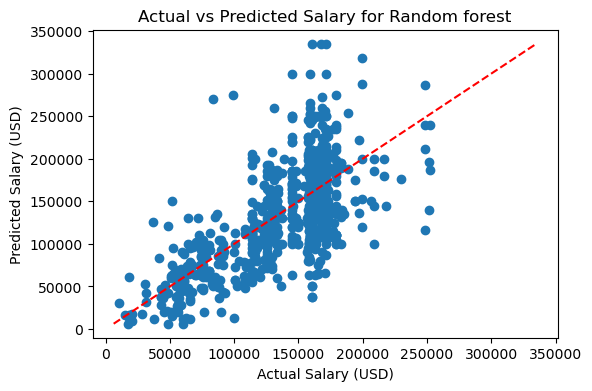

Linear Regression's RMSE before dropping variables: 48017.137073766644
Linear Regression's RMSE after dropping variables based on p-value: 49889.60166676378 

Ridge Regression's RMSE: 44785.51012969179
Ridge Regression's R-squared: 0.43951299049254156 

Random Forest RMSE: 44731.07346367235
Random Forest R-squared: 0.4408747032880782


In [85]:
#######Linear Regression#########
X = df.drop(['salary_in_usd'], axis=1)
X_drop_p_value = df.drop(['salary_in_usd',
             'experience_level_2. Mid_Intermediate_level',
             'employment_type_Freelancer',
             'employment_type_Part_Time',
             'job_title_Data Engineer',
             'job_title_Data Scientist',
             'job_title_Others',
             'salary_currency_EUR',
             'salary_currency_GBP',
             'salary_currency_INR',
             'country_employee_residence_India',
             'country_employee_residence_Others',
             'country_employee_residence_Spain',
             'country_employee_residence_United Kingdom of Great Britain and Northern Ireland',
             'country_employee_residence_United States of America',
             'country_company_location_Others',
             'country_company_location_Spain',
             'country_company_location_United Kingdom of Great Britain and Northern Ireland',
             'country_company_location_United States of America',
              ], axis=1)

Y = df['salary_in_usd']

def linearRegression(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    linear_model = LinearRegression()
    linear_model.fit(X_train, Y_train)
    Y_pred = linear_model.predict(X_test)

    X_train = sm.add_constant(X_train)
    model_sm = sm.OLS(Y_train, X_train).fit()
    print(model_sm.summary())
    return Y_pred, Y_test

Y_pred_lm, Y_test_lm = linearRegression(X,Y)

Y_pred_drop, Y_test_drop = linearRegression(X_drop_p_value,Y)

plt.figure(figsize=(6, 4))
plt.scatter(Y_pred_lm, Y_test_lm)
plt.plot([Y_test_lm.min(), Y_test_lm.max()], [Y_test_lm.min(), Y_test_lm.max()], '--', color='r', label='Perfect Prediction')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs Predicted Salary for linear regression')
plt.show()
########Ridge regression##########
ridge_model = Ridge(alpha=46.416)
ridge_model.fit(x_train, y_train)
Y_pred_ridge = ridge_model.predict(x_test)

########Random Forest##########
rf_classifier = RandomForestRegressor(n_estimators=100 , max_depth=10, random_state=42)
rf_classifier.fit(x_train, y_train)
Y_pred_forest = rf_classifier.predict(x_test)

plt.figure(figsize=(6, 4))
plt.scatter(Y_pred_forest, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='r', label='Perfect Prediction')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs Predicted Salary for Random forest')
plt.show()


rmse_lm = math.sqrt(mean_squared_error(Y_test_lm, Y_pred_lm))
print("Linear Regression's RMSE before dropping variables:", rmse_lm)
rmse_lm_p = math.sqrt(mean_squared_error(Y_test_drop, Y_pred_drop))
print("Linear Regression's RMSE after dropping variables based on p-value:", rmse_lm_p, "\n")

rmse_rm = math.sqrt(mean_squared_error(y_test, Y_pred_ridge))
print("Ridge Regression's RMSE:", rmse_rm)
r_squared_rm = r2_score(y_test, Y_pred_ridge)
print("Ridge Regression's R-squared:", r_squared_rm,"\n")

rmse_forest = math.sqrt(mean_squared_error(y_test, Y_pred_forest))
print("Random Forest RMSE:", rmse_forest)
r_squared_forest = r2_score(y_test, Y_pred_forest)
print("Random Forest R-squared:", r_squared_forest)



In [86]:
# Create a new DataFrame with predictor variables for the individual
new_data = pd.DataFrame({
    'work_year': [2023], 
    'remote_ratio': [1], 
    'experience_level_2. Mid_Intermediate_level': [1], 
    'experience_level_3. Senior_level': [0],
    'experience_level_4. Executive_level': [0],
    'employment_type_Freelancer': [0],
    'employment_type_Full_Time': [1],
    'employment_type_Part_Time': [0],
    'job_title_Data Analyst': [0],
    'job_title_Data Engineer': [0],
    'job_title_Data Scientist': [1],
    'job_title_Machine Learning Engineer': [0],
    'job_title_Others': [0],
    'salary_currency_EUR': [0],
    'salary_currency_GBP': [0],
    'salary_currency_INR': [0],
    'salary_currency_Others': [0],
    'salary_currency_USD': [1],
    'company_size_M': [1],
    'company_size_S': [0],
    'country_employee_residence_India': [0],
    'country_employee_residence_Others': [0],
    'country_employee_residence_Spain': [0],
    'country_employee_residence_United Kingdom of Great Britain and Northern Ireland': [0],
    'country_employee_residence_United States of America': [1],
    'country_company_location_India': [0],
    'country_company_location_Others': [0],
    'country_company_location_Spain': [0],
    'country_company_location_United Kingdom of Great Britain and Northern Ireland': [0],
    'country_company_location_United States of America': [1]
})
# Make predictions using the trained XGBoost model
predicted_salary = xgboost_model.predict(new_data)
print("Predicted Salary:", predicted_salary[0])

Predicted Salary: 130995.695
